In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import EfficientNetB3
from keras import layers

Utils

In [1]:
import matplotlib.pyplot as plt
def plot_graph(h, accType, name):
    plt.plot(h.history[accType])
    plt.plot(h.history["val_" + accType])
    plt.title("model accuracy")
    plt.ylabel(accType)
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    fig = plt.gcf()
    name = "graphs/" + name + ".png"
    fig.savefig(name)
    plt.show()

In [13]:
import numpy as np
def create_bar(labels):
    sorted_dict = dict(sorted(labels.items()))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    years = sorted_dict.keys()
    frequency = sorted_dict.values()
    ax.set_xticks(np.arange(-5, 20))
    ax.bar(years,frequency)
    plt.title("Label distribution")
    plt.ylabel("Number of images")
    plt.xlabel("Class")
    plt.show()

Dataset

In [3]:
import dataset
dataset = dataset.Dataset()

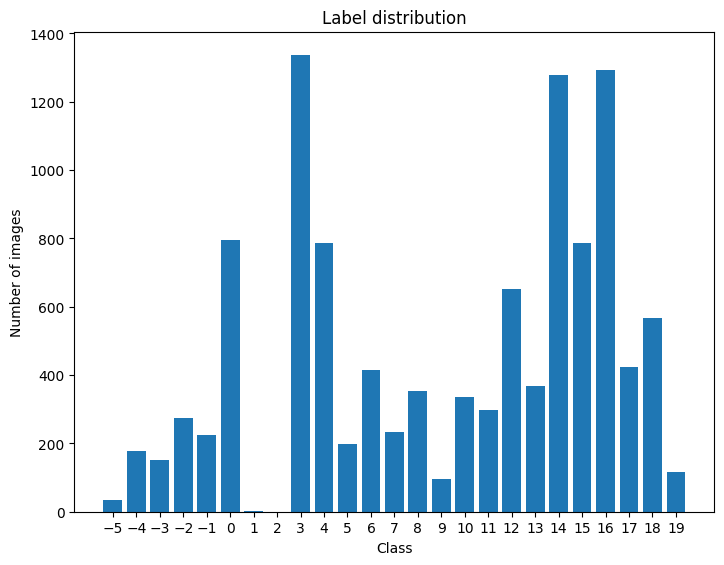

In [14]:
create_bar(dataset.metadata)

In [ ]:
DATAPATH = 'data/'
IMG_SIZE = 224 
SIZE = (IMG_SIZE, IMG_SIZE)
BATCH_SIZE = 32
LABELS = dataset.getLabelList()
# change labels = LABELS for regression
(train_set, test_set) = tf.keras.utils.image_dataset_from_directory(
    DATAPATH,
    image_size = SIZE,
    batch_size = BATCH_SIZE,
    labels = LABELS,
    label_mode = 'int',
    color_mode = 'rgb',
    validation_split = 0.2,
    subset = 'both',
    seed = 1234,
)

In [ ]:
Krizhevsky_Datapath = 'data/'
Krizhevsky_Size = (224, 224)

(krizhevsky_train_set, krizhevsky_test_set) = tf.keras.utils.image_dataset_from_directory(
    Krizhevsky_Datapath,
    image_size = Krizhevsky_Size,
    batch_size = 128,
    labels = "inferred",
    label_mode = 'int',
    color_mode = 'rgb',
    validation_split = 0.2,
    subset = 'both',
    seed = 1234,
)

In [ ]:
print(train_set.class_names)
num_classes = len(train_set.class_names)
num_classes

EfficientNetB3 with Sparse Categorical Crossentropy

In [ ]:
strategy = tf.distribute.MirroredStrategy()
augmentation = keras.Sequential([layers.RandomRotation(0.1), layers.RandomBrightness(0.1), layers.RandomContrast(0.1)])

with strategy.scope():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    augmented = augmentation(inputs)
    efficientnet = EfficientNetB3(include_top=False, input_tensor=augmented, weights="imagenet")
    pooling = layers.GlobalAveragePooling2D()(efficientnet.output)
    batch_norm = layers.BatchNormalization()(pooling)
    dropout = layers.Dropout(0.2)(batch_norm)
    outputs = layers.Dense(num_classes, activation="softmax")(dropout)
    modelEfficientNet = keras.Model(inputs=inputs, outputs=outputs)
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    modelEfficientNet.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

EfficientNetB3 with Sparse Categorical Crossentropy with dense layers

In [ ]:
strategy = tf.distribute.MirroredStrategy()
augmentation = keras.Sequential([layers.RandomRotation(0.1), layers.RandomBrightness(0.1), layers.RandomContrast(0.1)])

with strategy.scope():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    augmented = augmentation(inputs)
    efficientnet = EfficientNetB3(include_top=False, input_tensor=augmented, weights="imagenet")
    pooling = layers.GlobalAveragePooling2D()(efficientnet.output)
    batch_norm = layers.BatchNormalization()(pooling)
    dropout = layers.Dropout(0.2)(batch_norm)
    layer3 = layers.Dense(units = 512, activation='relu')(dropout)
    layer2 = layers.Dense(units = 256, activation='relu')(layer3)
    layer1 = layers.Dense(units = 128, activation='relu')(layer2)
    outputs = layers.Dense(num_classes, activation="softmax")(layer1)
    modelEfficientNetConnected = keras.Model(inputs=inputs, outputs=outputs)
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    modelEfficientNetConnected.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

EfficientNetB3 with Sparse Categorical Crossentropy with dense layers and dropout

In [ ]:
strategy = tf.distribute.MirroredStrategy()
augmentation = keras.Sequential([layers.RandomRotation(0.1), layers.RandomBrightness(0.1), layers.RandomContrast(0.1)])

with strategy.scope():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    augmented = augmentation(inputs)
    efficientnet = EfficientNetB3(include_top=False, input_tensor=augmented, weights="imagenet")
    pooling = layers.GlobalAveragePooling2D()(efficientnet.output)
    batch_norm = layers.BatchNormalization()(pooling)
    dropout3 = layers.Dropout(0.2)(batch_norm)
    layer3 = layers.Dense(units = 512, activation='relu')(dropout3)
    dropout2 = layers.Dropout(0.2)(layer3)
    layer2 = layers.Dense(units = 256, activation='relu')(dropout2)
    dropout1 = layers.Dropout(0.2)(layer2)
    layer1 = layers.Dense(units = 128, activation='relu')(dropout1)
    outputs = layers.Dense(num_classes, activation="softmax")(layer1)
    modelEfficientNetConnectedDropout = keras.Model(inputs=inputs, outputs=outputs)
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    modelEfficientNetConnectedDropout.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

EfficientNet3 with Mean Absolute Error

In [ ]:
strategy = tf.distribute.MirroredStrategy()
augmentation = keras.Sequential([layers.RandomRotation(0.1), layers.RandomBrightness(0.1), layers.RandomContrast(0.1)])

with strategy.scope():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    augmented = augmentation(inputs)
    efficientnet = EfficientNetB3(include_top=False, input_tensor=inputs, weights="imagenet")
    pooling = layers.GlobalAveragePooling2D()(efficientnet.output)
    batch_norm = layers.BatchNormalization()(pooling)
    dropout3 = layers.Dropout(0.2)(batch_norm)
    layer3 = layers.Dense(units = 256, activation='relu')(dropout3)
    dropout2 = layers.Dropout(0.2)(layer3)
    layer2 = layers.Dense(units = 128, activation='relu')(dropout2)
    dropout1 = layers.Dropout(0.2)(layer2)
    layer1 = layers.Dense(units = 64, activation='relu')(dropout1)
    outputs = layers.Dense(units = 1)(layer1)
    modelEfficientNet = keras.Model(inputs=inputs, outputs=outputs)
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    modelEfficientNet.compile(
        optimizer=optimizer, loss="mean_absolute_error", metrics=["mean_absolute_error"]
    )

EfficientNetB3 with MAE, larger fully connected layer

In [ ]:
strategy = tf.distribute.MirroredStrategy()
augmentation = keras.Sequential([layers.RandomRotation(0.1), layers.RandomBrightness(0.1), layers.RandomContrast(0.1)])

with strategy.scope():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    augmented = augmentation(inputs)
    efficientnet = EfficientNetB3(include_top=False, input_tensor=inputs, weights="imagenet")
    pooling = layers.GlobalAveragePooling2D()(efficientnet.output)
    batch_norm = layers.BatchNormalization()(pooling)
    dropout = layers.Dropout(0.2)(batch_norm)
    layer3 = layers.Dense(units = 512, activation='relu')(dropout)
    layer2 = layers.Dense(units = 256, activation='relu')(layer3)
    layer1 = layers.Dense(units = 64, activation='relu')(layer2)
    outputs = layers.Dense(units = 1)(layer1)
    modelEfficientNet = keras.Model(inputs=inputs, outputs=outputs)
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    modelEfficientNet.compile(
        optimizer=optimizer, loss="mean_absolute_error", metrics=["mean_absolute_error"]
    )

Model from [this](https://datascience.stackexchange.com/questions/106600/how-to-perform-regression-on-image-data-using-tensorflow) StackOverflow post. <br>
This uses a regression model.

In [22]:
augmentation_layer = tf.keras.Sequential([                                    
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomBrightness(0.1)
], name='data_augmentation')  

model = tf.keras.Sequential([
    augmentation_layer,
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss='mean_absolute_error', optimizer="adam", metrics=['mean_absolute_error'])

Network from [This](https://papers.nips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) paper _without_ multi GPU: <br>
5 Conv layers followed by 3 fully connected layers. Afer each fully connected layer, a ReLu unit is used as nonlinearity. Additionally normalization and dropout are applied 
(found via [Image Orientation Estimation with Convolutional Networks](https://lmb.informatik.uni-freiburg.de/Publications/2015/FDB15/image_orientation.pdf)). <br>
**Not Implemented**: 
- Multiple GPUs
- First Layers with Stride of 4

Other hyper parameters to change: 
- Batch size of 128
- 90 cycles through the training set

In [30]:
callbacks = [ tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5)] # Paper does not specify the patience, so I chose 5
optimizer = tf.keras.optimizers.experimental.SGD(weight_decay=0.0005, learning_rate=0.01, momentum=0.9)

one_bias_initializer = tf.keras.initializers.Constant(value=1)
zero_bias_initializer = tf.keras.initializers.Constant(value=0)

KrizhevskyModel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(5, 5, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None), bias_initializer=zero_bias_initializer),
    tf.keras.layers.Lambda(lambda input: tf.nn.local_response_normalization(input=input, alpha=0.0001, beta=0.75, depth_radius=5, bias=2.0)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(3, 3, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None), bias_initializer=one_bias_initializer),
    tf.keras.layers.Lambda(lambda input: tf.nn.local_response_normalization(input=input, alpha=0.0001, beta=0.75, depth_radius=5, bias=2.0)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(3, 3, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None), bias_initializer=zero_bias_initializer),
    tf.keras.layers.Conv2D(3, 3, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None), bias_initializer=one_bias_initializer),
    tf.keras.layers.Conv2D(3, 3, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None), bias_initializer=one_bias_initializer),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=4096, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None), bias_initializer=one_bias_initializer),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=4096, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None), bias_initializer=one_bias_initializer),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=num_classes, activation='softmax', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None), bias_initializer=one_bias_initializer),
])

KrizhevskyModel.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
EPOCHS = 100

EfficientNet

In [ ]:
histEfficientNet = modelEfficientNet.fit(train_set, epochs=EPOCHS, validation_data=test_set) 

In [ ]:
plot_graph(histEfficientNet, "mean_absolute_error", "EfficientNetB3")

In [ ]:
histEfficientNetConnected = modelEfficientNetConnected.fit(train_set, epochs=EPOCHS, validation_data=test_set)

In [ ]:
plot_graph(histEfficientNetConnected, "accuracy", "EfficientNetB3Connected")

In [ ]:
histEfficientNetConnectedDropout = modelEfficientNetConnectedDropout.fit(train_set, epochs=EPOCHS, validation_data=test_set)

In [ ]:
plot_graph(histEfficientNetConnectedDropout, "accuracy", "EfficientNetB3ConnectedDropout")

Model

In [ ]:
histModel = model.fit(train_set, epochs=EPOCHS, validation_data=test_set)

In [ ]:
plot_graph(histModel, "mean_absolute_error", "Model1")

Krizhevsky

In [ ]:
histKrizhevsky = KrizhevskyModel.fit(train_set, epochs=90, validation_data=test_set, callbacks=callbacks)

In [ ]:
plot_graph(histKrizhevsky, "accuracy", "Krizhevsky")

AutoKeras from [this](https://autokeras.com/tutorial/image_regression/) tutorial

In [ ]:
import autokeras as ak

reg = ak.ImageRegressor(overwrite=True, max_trials=5, loss="mean_absolute_error", metrics=["mean_absolute_error"])
reg.fit(train_set, epochs=10)